In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from data_gen import generate_covariates
from scipy.stats import norm
from agent_distribution import AgentDistribution

In [2]:
X, socio_econ = generate_covariates()

In [3]:
d = X.shape[1]
beta = np.ones(d)/ np.sqrt(d)
beta

array([0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
       0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777])

In [4]:
scores = np.dot(X, beta)
quantile = np.quantile(scores, 0.7)

Text(0.5, 1.0, 'Score Distribution, Uniform Beta')

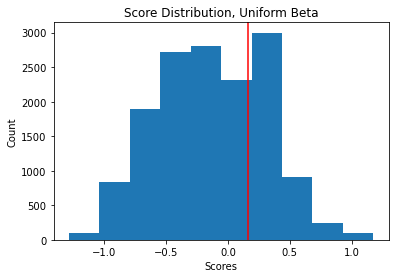

In [5]:
plt.hist(scores)
plt.axvline(x=quantile, c="r")
plt.xlabel("Scores")
plt.ylabel("Count")
plt.title("Score Distribution, Uniform Beta")

(array([1.000e+01, 3.300e+01, 5.640e+02, 2.170e+03, 3.437e+03, 4.437e+03,
        2.592e+03, 1.408e+03, 2.620e+02, 2.000e+00]),
 array([0.        , 0.10016706, 0.20033411, 0.30050117, 0.40066823,
        0.50083528, 0.60100234, 0.7011694 , 0.80133645, 0.90150351,
        1.00167056]),
 <BarContainer object of 10 artists>)

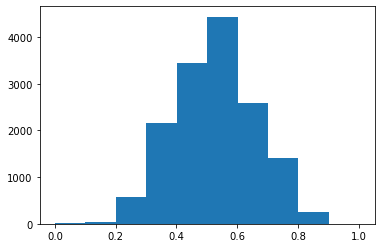

In [6]:
plt.hist(socio_econ)

In [7]:
def compute_gammas(socio_econ):
    return 1/(socio_econ + 1e-1)

def compute_etas(X, gammas, sigma, beta, s):
    etas = X + (1/(2 * gammas)) * norm.pdf(s - np.dot(X, beta), 0, scale=sigma).reshape(X.shape[0], 1) * beta
    return etas

In [8]:
gammas = compute_gammas(socio_econ)
etas = compute_etas(X, gammas=gammas, sigma=0.1, beta=beta, s=0.25)

(array([ 312., 2161., 3760., 2845.,  684., 1633., 1389., 1482.,  569.,
          80.]),
 array([-1.28285176, -0.93567525, -0.58849873, -0.24132222,  0.10585429,
         0.4530308 ,  0.80020732,  1.14738383,  1.49456034,  1.84173685,
         2.18891336]),
 <BarContainer object of 10 artists>)

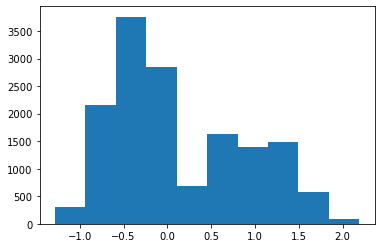

In [9]:
true_scores = np.dot(etas, beta)
plt.hist(true_scores)

In [10]:
def loss(X, etas, gammas, ideal_beta):
    scores = np.dot(X, beta)
    cutoff = np.quantile(scores, 0.7)
    rejected = scores < cutoff
    losses = -np.dot(etas, ideal_beta)
    losses[rejected] = 0.
    return losses

In [11]:
losses = loss(X=X, etas=etas, gammas=gammas, ideal_beta=beta)
print(sum(losses)/len(losses))

-0.32767084454057266


In [13]:
etas = etas.reshape(etas.shape[0], etas.shape[1], 1)
gammas = gammas.flatten() * np.ones(etas.shape)

In [14]:
agent_dist = AgentDistribution(n=1000000, d=10, n_types=len(gammas), types={"etas":etas, "gammas":gammas}, prop=None)